In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import RobotManyDofs
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, cart_to_joint_dynamic
from ppr.sampling import get_shortest_path

In [6]:
# ROBOT
robot1 = RobotManyDofs(8, link_length=1)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 8)

# PATH
#dx    = TolerancedNumber(2, 0.3, 0.8, samples=3)
dx    = np.ones(5) * 5
dy    = np.linspace(1.3, 2.5, 5)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([dx[i], dy[i], angle]) for i in range(5)]

# COLLISION SCENE
sc1 = []
sc1.append(Rectangle(0, -1, 5, 0.2, 0)) # horizontal lower
sc1.append(Rectangle(0, 3, 5, 0.2, 0)) # horizontal upper
sc1.append(Rectangle(1, -1, 0.2, 2.5, 0)) # vertical left
sc1.append(Rectangle(2.5, 1, 0.2, 2, 0)) # vertical middle
sc1.append(Rectangle(4, -1, 0.2, 2.5, 0)) # vertical right

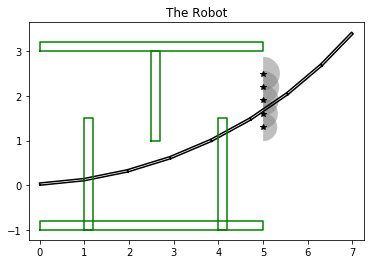

In [7]:
q_random = [0.1] * 8

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, q_random, 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [8]:
robot1.ik_samples = [7] * 5

start_time = time.time()

path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='random',N_cart=10,N_red_joints=125)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='halton',N_cart=10,N_red_joints=125)

print([len(qp) for qp in path_js])
sol = get_shortest_path(path_js)
print(sol['success'])

print("Total time: " + str(time.time()-start_time))
print("Path length: " + str(sol['length']))

KeyboardInterrupt: 

In [8]:
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
settings = {'max_iters': 20, 'min_js': 100, 'js_inc': 10, 'red_js_inc': 100,
            'ik_sampling_method': 'halton'}
path_js = cart_to_joint_dynamic(robot1, path1, check_collision = True, scene=sc1,
                                parameters=settings)

Processing trajectory point[ 5.   1.3  0. ]
Using 'halton' sampling for redundant kinematics
Found 54 joint solutions
After 19 iterations
Processing trajectory point[ 5.   1.6  0. ]
Using 'halton' sampling for redundant kinematics
Found 94 joint solutions
After 19 iterations
Processing trajectory point[ 5.   1.9  0. ]
Using 'halton' sampling for redundant kinematics
Found 76 joint solutions
After 19 iterations
Processing trajectory point[ 5.   2.2  0. ]
Using 'halton' sampling for redundant kinematics
Found 51 joint solutions
After 19 iterations
Processing trajectory point[ 5.   2.5  0. ]
Using 'halton' sampling for redundant kinematics
Found 18 joint solutions
After 19 iterations


In [9]:
print([len(qp) for qp in path_js])

[54, 94, 76, 51, 18]


In [10]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
True


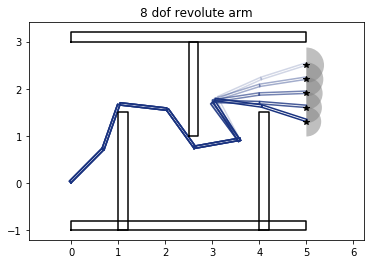

In [11]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
    
plt.title("8 dof revolute arm")
plt.show()

In [17]:
from ppr.sampling import iterative_bfs

In [18]:
sol = iterative_bfs(robot1, path1, sc1, tol=1e-6, red=3, max_iter=10)

converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q


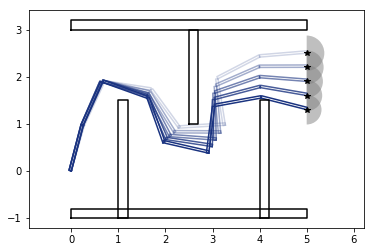

In [20]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
plt.show()